# Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
%pwd

'C:\\Users\\Amira\\IPYNB'

In [5]:
# Reading excel file of raw data
xls = pd.ExcelFile(r'C:\\Users\\Amira\\KPMG_VI_New_raw_data_update_final.xlsx')

In [6]:
# Reading each sheet in a sepaerate file using the second row as a Header 
df_transactions = pd.read_excel(xls, 'Transactions',header = 1)
df_new_cust = pd.read_excel(xls, 'NewCustomerList',header = 1)
df_cust_demo = pd.read_excel(xls, 'CustomerDemographic',header = 1)
df_cust_address = pd.read_excel(xls, 'CustomerAddress',header = 1)

# Assessing Transactions DF sheet

In [4]:
# Assessing the first data frame of Transactions
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
#checking transactions DF info.(Dtypes, Null values)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
#checking transactions DF dulicated records.
df_transactions.duplicated().sum()

0

In [7]:
#checking transactions DF Null values.
df1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
# checking transactions df statistics
df_transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [9]:
# checking transactions df Count of Unique customer's id number
df_transactions.customer_id.nunique()

3494

In [12]:
# count of the first 20 customer unique ids in descending order
df1.customer_id.value_counts()[:20]

2183    14
1068    14
2476    14
2072    13
1672    13
1302    13
3232    13
2464    13
637     13
2912    13
1946    13
1140    13
2755    13
1129    13
3048    13
3326    13
1913    13
2548    13
377     13
1076    12
Name: customer_id, dtype: int64

##  Transactions DataFrame issues:


Quality Issue
Transaction data table

1-__Accuracy__
-‘product_first_sold_date' column has incorrect Values( not in date format)


2 __Completeness__
-there are missing values in the following columns (online_order, brand, product_line, product_class, product_size, standard_cost, product_first_sold_date)


3 __Consistency__
- SomeProduct of high class have a range of low prices (e.g 12 $ list price)

4 __Validity__

-’Product Id’ has zero value

-list price is much greater than standard cost in some of the rows,

-'online_order' column should be a bool value not a float64

-'product_first_sold_date' should be in datetime

5 __Uniqueness__ (no Duplication of Data)

 

#  Assessing  CustomerDemographic sheet:


In [10]:
df_cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [12]:
#checking Cusomer Demographic DF info.
df_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [13]:
#checking Cusomer Demographic DF stats.
df_cust_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [15]:
#checking Cusomer Demographic DF null values.
df_cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [16]:
#checking Cusomer Demographic DF unique customer_id.
df_cust_demo.customer_id.nunique()

4000

In [17]:
#checking Cusomer Demographic DF duplicated values.
df_cust_demo.duplicated().sum()

0

In [20]:
# slicing DOB column for unrealistic values
df_cust_demo[['DOB','deceased_indicator']].sort_values(by = 'DOB')

,DOB,deceased_indicator
33,1843-12-21,N
719,1931-10-23,N
1091,1935-08-22,N
3409,1940-09-22,N
2412,1943-08-11,N
...,...,...
3778,NaT,N
3882,NaT,N
3930,NaT,N
3934,NaT,N


## Data Quality issues in the customer demographic DF:

__Accuracy__

-DOB column has an inaccurate value '1843-12-21'

-incorrect values in Gender column like (U) 

__Completeness__

-There are missing values in the following columns (last name, DOB, job title,  job_industry_category, tenure) 
        
__Consistency__

-DOB , deceased indicator columns contains a value of  '1843-12-21'	and not deceased
-Inconsistent writing format (e.g F instead of female) 

__Currency__

-Data is not updated since some of the values of the DOB are mistaken.

__Relevance__

-’Default’ column contains irrelevant data( ununderstandable)

-‘tenure’ column should be indicative of the actual period

__Validity__

-’past_3_years_bike_related_purchases’ column has null values and customers are segmented of high net worth
- Affluent Customer with tenures of  1 & 2 , Geological engineer with tenure of 1 , and 76 purchases is possibly an invalid Data



# 3rd Assessing Customer Addresses

In [21]:
df_cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [22]:
#checking Cusomer addresses DF info.
df_cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [23]:
#checking Cusomer Demographic null values.
df_cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [24]:
#checking Cusomer Demographic duplicated values.
df_cust_address.duplicated().sum()

0

In [25]:
#checking Cusomer Demographic stats values.
df_cust_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


## Data Quality issues in the customer address DF:

__Accuracy__

-indistinctive addresses data (e.g. ‘0 Golden Leaf Crossing’)doesn't indicate the exact location

__Completeness__

-One missing data record for customer's id since there are 4000 customers the data set contains 3999

__Consistency__

-State Column is written in abbreviations sometimes and some times as a whole

__Relevance__

-'property_valuation' column doesn't indicate a meta Data or the criteria on which it was set.


# Tidiness Issues:
Customer Demographics and addresses should be in one observational unit (merged)



# Cleaning Data

In [9]:
# Renameing the 'past_3_years_bike_related_purchases' column for simplcity
df_cust_demo.rename(columns = {'past_3_years_bike_related_purchases':'bike_pur_3y'} , inplace = True)

In [58]:
#merging Customer Demo and Addresses
df_Cust_master = pd.merge(df_cust_demo , df_cust_address , on=['customer_id'])

In [59]:
df_Cust_master

,customer_id,first_name,last_name,gender,bike_pur_3y,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0 Transport Center,3977,VIC,Australia,6
3992,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2
3993,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6
3994,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3


In [60]:
df_Cust_master.drop(['default','country'], axis=1, inplace=True)

In [61]:
df_Cust_master.gender.value_counts()

Female    2035
Male      1870
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [62]:
#Replacing Fault values in Gender column
df_Cust_master.gender.replace(['F','Femal'],'Female', inplace=True)

df_Cust_master.gender.replace(['M'],'Male',inplace=True)

In [63]:
#Test
df_Cust_master.gender.value_counts()

Female    2037
Male      1871
U           88
Name: gender, dtype: int64

In [64]:
#Adding "Age" Column in the df_Cust_master 
now = pd.Timestamp('now')
df_Cust_master['DOB'] = pd.to_datetime(df_Cust_master['DOB'], format='%m%d%y')    # 1
df_Cust_master['DOB'] = df_Cust_master['DOB'].where(df_Cust_master['DOB'] < now, df_Cust_master['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df_Cust_master['age'] = (now - df_Cust_master['DOB']).astype('<m8[Y]')    # 3

In [65]:
df_Cust_master.age.describe()

count    3909.000000
mean       42.841903
std        12.788936
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max       176.000000
Name: age, dtype: float64

In [66]:
# Dropping age of more than 65
senior = df_Cust_master[(df_Cust_master.age > 65.0)].index
df_Cust_master.drop(senior, inplace = True)

In [67]:
#Test
df_Cust_master.age.describe()

count    3829.000000
mean       42.305563
std        12.228712
min        18.000000
25%        33.000000
50%        43.000000
75%        51.000000
max        65.000000
Name: age, dtype: float64

In [68]:
df_Cust_master.duplicated().sum()

0

In [69]:
# Adding age bins 
bins = [18, 25, 35, 45, 60, 65]
df_Cust_master['age_bin'] = pd.cut(df_Cust_master['age'], bins)

In [70]:
df_Cust_master

,customer_id,first_name,last_name,gender,bike_pur_3y,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,age,age_bin
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,10,39.0,"(35.0, 45.0]"
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,9,59.0,"(45.0, 60.0]"
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,4,43.0,"(35.0, 45.0]"
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,9,54.0,"(45.0, 60.0]"
5,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,4 Delaware Trail,2210,New South Wales,9,44.0,"(35.0, 45.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,0 Transport Center,3977,VIC,6,45.0,"(35.0, 45.0]"
3992,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,4 Dovetail Crossing,2350,NSW,2,19.0,"(18.0, 25.0]"
3993,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,736 Roxbury Junction,2540,NSW,6,NaN,NaN
3994,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,1482 Hauk Trail,3064,VIC,3,47.0,"(45.0, 60.0]"


In [71]:
df_Cust_master.bike_pur_3y.describe()

count    3916.000000
mean       48.886874
std        28.687593
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: bike_pur_3y, dtype: float64

In [72]:
df_Cust_master.wealth_segment.value_counts()

Mass Customer        1953
High Net Worth       1001
Affluent Customer     962
Name: wealth_segment, dtype: int64

In [73]:
df_Cust_master.deceased_indicator.value_counts()

N    3914
Y       2
Name: deceased_indicator, dtype: int64

In [78]:
# Dropping deceased customers
df_deceased = df_Cust_master[df_Cust_master['deceased_indicator'] =='Y']

df_master = df_Cust_master.drop(df_deceased.index)

In [81]:
#Test
df_master.deceased_indicator.value_counts()

N    3914
Name: deceased_indicator, dtype: int64

In [108]:
df_master.state.value_counts()

NSW                2010
VIC                 920
QLD                 821
New South Wales      84
Victoria             79
Name: state, dtype: int64

In [109]:
#Replacng State values to be non repetitve
df_master.state.replace(['New South Wales'],'NSW',inplace=True)
df_master.state.replace(['Victoria'],'VIC',inplace=True)

In [110]:
#Test
df_master.state.value_counts()

NSW    2094
VIC     999
QLD     821
Name: state, dtype: int64

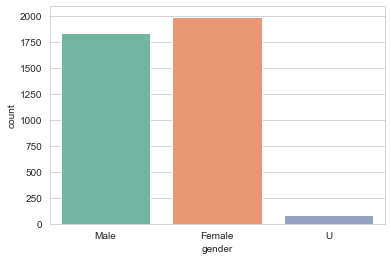

In [123]:
sb.set_style('whitegrid')
sb.set_palette('Set2')
sb.countplot(x='gender' ,data = df_master, palette='Set2')

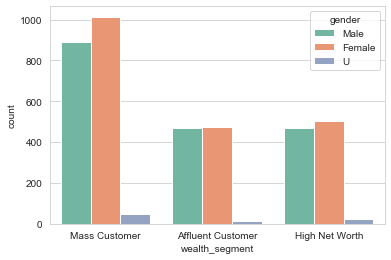

In [100]:
sb.countplot(x='wealth_segment', hue='gender', data = df_master)

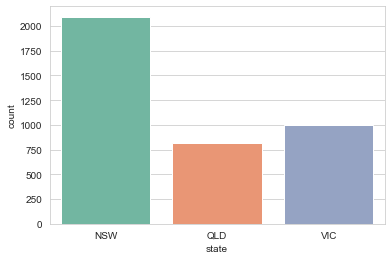

In [124]:
sb.countplot(x= 'state',data=df_master);

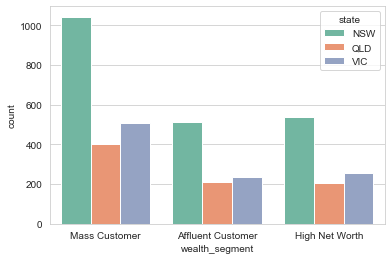

In [132]:
sb.countplot(x='wealth_segment', hue='state', data=df_master)

In [134]:
df_master.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'bike_pur_3y',
       'DOB', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'property_valuation', 'age', 'age_bin'],
      dtype='object')

In [136]:
df_master_sub = df_master[['gender', 'bike_pur_3y','wealth_segment','tenure','age','property_valuation']]

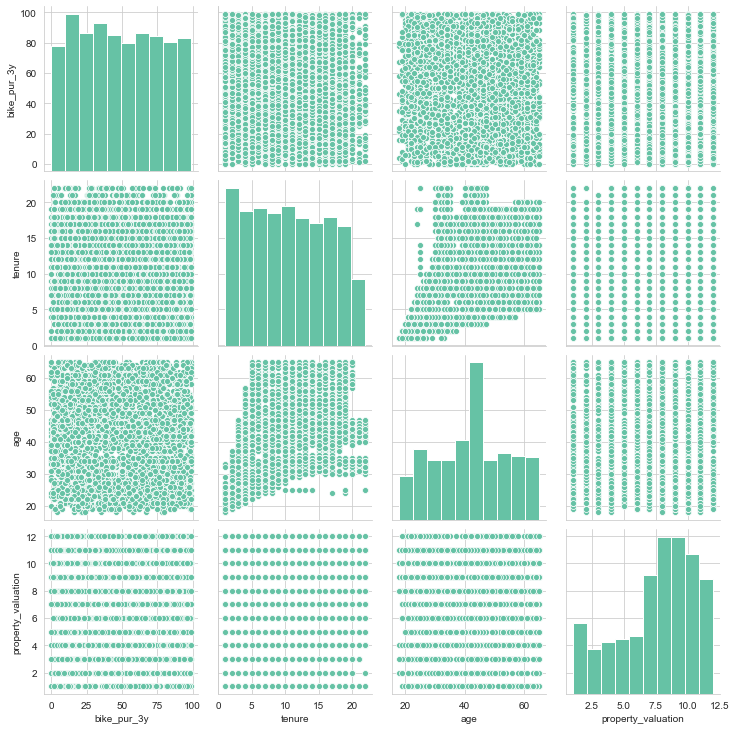

In [138]:
sb.pairplot(data=df_master_sub)

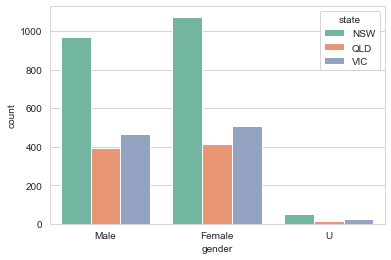

In [148]:
sb.countplot(x='gender',hue='state', data=df_master)

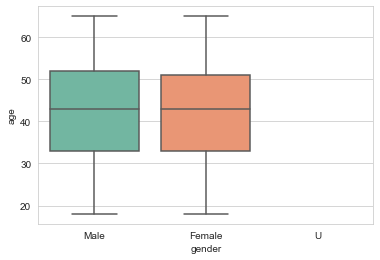

In [154]:
sb.boxplot(x='gender', y='age', data=df_master)